# Demo ULFxMAG & PC1xMAG products in VirES

In [1]:
import datetime as dt
from collections import namedtuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from tabulate import tabulate
from viresclient import SwarmRequest

xr.set_options(display_expand_attrs=False, display_expand_data_vars=True)

In [2]:
SERVER_URL = "https://disc.vires.services/ows"

In [3]:
START_TIME = dt.datetime(2016, 1, 1)
END_TIME = dt.datetime(2016, 1, 3)

## ULF and PC1 collections are each split into sub-collections

In [4]:
COLLECTIONS_SW_ULFxMAG = [
    "SW_OPER_ULFxMAG_2F",
    "SW_OPER_ULFxMAG_2F:event",
    "SW_OPER_ULFxMAG_2F:event_mean",
]
COLLECTIONS_SW_PC1xMAG = [
    "SW_OPER_PC1xMAG_2F:Bp_event",
    "SW_OPER_PC1xMAG_2F:Bp_event_mean",
    "SW_OPER_PC1xMAG_2F:Br_event",
    "SW_OPER_PC1xMAG_2F:Br_event_mean",
    "SW_OPER_PC1xMAG_2F:Ba_event",
    "SW_OPER_PC1xMAG_2F:Ba_event_mean",
]

In [5]:
request = SwarmRequest(SERVER_URL)
ULF_VARS = {
    collection: request.available_measurements(collection.replace("x", "A"))
    for collection in COLLECTIONS_SW_ULFxMAG
}
PC1_VARS = {
    collection: request.available_measurements(collection.replace("x", "A"))
    for collection in COLLECTIONS_SW_PC1xMAG
}

In [6]:
def regularise_ragged_dict(d):
    max_length = max(len(length) for length in d.values())
    for key in d:
        while len(d[key]) < max_length:
            d[key].append(None)
    return d


def tabulate_dict(d, format="markdown"):
    return tabulate(
        regularise_ragged_dict(d),
        headers=d.keys(),
        tablefmt=format,
    )

### Collection names and constituent variable names

In [7]:
print(tabulate_dict(ULF_VARS, format="markdown"))

SW_OPER_ULFxMAG_2F    SW_OPER_ULFxMAG_2F:event    SW_OPER_ULFxMAG_2F:event_mean
--------------------  --------------------------  -------------------------------
Timestamp             Timestamp                   Timestamp
Latitude              Latitude                    Latitude
Longitude             Longitude                   Longitude
Radius                Radius                      Radius
Latitude_QD           Latitude_QD                 Latitude_QD
Longitude_QD          Longitude_QD                Longitude_QD
MLT_QD                MLT_QD                      MLT_QD
UT                    SZA                         SZA
SZA                   ID                          ID
Frequency_dominant    ORB                         ORB
Halfwidth             DIR                         DIR
Power                 Frequency                   Duration
Prominence            Halfwidth                   Frequency
Pc2_act               Power                       Freq_std
Pc3_act               Promi

In [8]:
print(tabulate_dict(PC1_VARS, format="markdown"))

SW_OPER_PC1xMAG_2F:Bp_event    SW_OPER_PC1xMAG_2F:Bp_event_mean    SW_OPER_PC1xMAG_2F:Br_event    SW_OPER_PC1xMAG_2F:Br_event_mean    SW_OPER_PC1xMAG_2F:Ba_event    SW_OPER_PC1xMAG_2F:Ba_event_mean
-----------------------------  ----------------------------------  -----------------------------  ----------------------------------  -----------------------------  ----------------------------------
ID                             Timestamp                           ID                             Timestamp                           ID                             Timestamp
Timestamp                      Latitude                            Timestamp                      Latitude                            Timestamp                      Latitude
Latitude                       Longitude                           Latitude                       Longitude                           Latitude                       Longitude
Longitude                      Radius                              Longitude  

### Mapping to original variables in CDF files

```
SW_ULFxMAG_2F
  - Timestamp
  - Latitude
  - Longitude
  - Radius
  - Latitude_QD
  - Longitude_QD
  - UT
  - MLT_QD => MLT
  - SZA
  - Frequency_dominant
  - Halfwidth
  - Power
  - Prominence
  - Pc2_act
  - Pc3_act
  - Pc4_act
  - Pi2_act
  - Flag_Pc2
  - Flag_Pc3
  - Flag_Pc4
  - Flag_Pi2
  - Flag_EPB
  - Flag_FAC

SW_ULFxMAG_2F:event
  - Timestamp => Timestamp_e
  - Latitude => Latitude_e
  - Longitude => Longitude_e
  - Radius => Radius_e
  - Latitude_QD => Latitude_QD_e
  - Longitude_QD => Longitude_QD_e
  - MLT_QD => MLT_e
  - SZA => SZA_e
  - ID => ID_e
  - ORB => ORB_e
  - DIR => DIR_e
  - Frequency => Frequency_e
  - Halfwidth => Halfwidth_e
  - Power => Power_e
  - Prominence => Prominence_e
  - EPB => EPB_e
  - FAC => FAC_e
  - Flag_B => Flag_B_e
  - Quality => Quality_e

SW_ULFxMAG_2F:event_mean: (21)
  - Timestamp => Timestamp_m
  - Latitude => Latitude_m
  - Longitude => Longitude_m
  - Radius => Radius_m
  - Latitude_QD => Latitude_QD_m
  - Longitude_QD => Longitude_QD_m
  - MLT_QD => MLT_m
  - SZA => SZA_m
  - ID => ID_m
  - ORB => ORB_m
  - DIR => DIR_m
  - Duration => Duration_m
  - Frequency => Frequency_m
  - Freq_std => Freq_std_m
  - Halfwidth => Halfwidth_m
  - Power => Power_m
  - Prominence => Prominence_m
  - EPB => EPB_m
  - FAC => FAC_m
  - Flag_B => Flag_B_m
  - Quality => Quality_m

SW_PC1xMAG_2F:Bp_event
  - ID => ID_Bp
  - Timestamp => Timestamp_Bp
  - Latitude => Latitude_Bp
  - Longitude => Longitude_Bp
  - Radius => Radius_Bp
  - Latitude_QD => Latitude_QD_Bp
  - Longitude_QD => Longitude_QD_Bp
  - MLT_QD => MLT_Bp
  - SZA => SZA_Bp
  - ORB => ORB_Bp
  - DIR => DIR_Bp
  - Frequency => Frequency_Bp
  - Halfwidth => Halfwidth_Bp
  - Power => Power_Bp
  - Prominence => Prominence_Bp
  - Quality_B => Quality_B_Bp
  - Quality_p => Quality_p_Bp
  - Quality_n => Quality_n_Bp

SW_PC1xMAG_2F:Bp_event_mean
  - Timestamp => Timestamp_m_Bp
  - Latitude => Latitude_m_Bp
  - Longitude => Longitude_m_Bp
  - Radius => Radius_m_Bp
  - Latitude_QD => Latitude_QD_m_Bp
  - Longitude_QD => Longitude_QD_m_Bp
  - MLT_QD => MLT_m_Bp
  - SZA => SZA_m_Bp
  - ID => ID_m_Bp
  - ORB => ORB_m_Bp
  - DIR => DIR_m_Bp
  - Duration => Duration_m_Bp
  - Frequency => Frequency_m_Bp
  - Freq_std => Freq_std_m_Bp
  - Halfwidth => Halfwidth_m_Bp
  - Power => Power_m_Bp
  - Prominence => Prominence_m_Bp
  - ROFC => ROFC_m_Bp
  - Quality => Quality_m_Bp

SW_PC1xMAG_2F:Br_event
  - Timestamp => Timestamp_Br
  - Latitude => Latitude_Br
  - Longitude => Longitude_Br
  - Radius => Radius_Br
  - Latitude_QD => Latitude_QD_Br
  - Longitude_QD => Longitude_QD_Br
  - MLT_QD => MLT_Br
  - SZA => SZA_Br
  - ID => ID_Br
  - ORB => ORB_Br
  - DIR => DIR_Br
  - Frequency => Frequency_Br
  - Halfwidth => Halfwidth_Br
  - Power => Power_Br
  - Prominence => Prominence_Br
  - Quality_B => Quality_B_Br
  - Quality_p => Quality_p_Br
  - Quality_n => Quality_n_Br

SW_PC1xMAG_2F:Br_event_mean
  - Timestamp => Timestamp_m_Br
  - Latitude => Latitude_m_Br
  - Longitude => Longitude_m_Br
  - Radius => Radius_m_Br
  - Latitude_QD => Latitude_QD_m_Br
  - Longitude_QD => Longitude_QD_m_Br
  - MLT_QD => MLT_m_Br
  - SZA => SZA_m_Br
  - ID => ID_m_Br
  - ORB => ORB_m_Br
  - DIR => DIR_m_Br
  - Duration => Duration_m_Br
  - Frequency => Frequency_m_Br
  - Freq_std => Freq_std_m_Br
  - Halfwidth => Halfwidth_m_Br
  - Power => Power_m_Br
  - Prominence => Prominence_m_Br
  - ROFC => ROFC_m_Br
  - Quality => Quality_m_Br

SW_PC1xMAG_2F:Ba_event
  - Timestamp => Timestamp_Ba
  - Latitude => Latitude_Ba
  - Longitude => Longitude_Ba
  - Radius => Radius_Ba
  - Latitude_QD => Latitude_QD_Ba
  - Longitude_QD => Longitude_QD_Ba
  - MLT_QD => MLT_Ba
  - SZA => SZA_Ba
  - ID => ID_Ba
  - ORB => ORB_Ba
  - DIR => DIR_Ba
  - Frequency => Frequency_Ba
  - Halfwidth => Halfwidth_Ba
  - Power => Power_Ba
  - Prominence => Prominence_Ba
  - Quality_B => Quality_B_Ba
  - Quality_p => Quality_p_Ba
  - Quality_n => Quality_n_Ba

SW_PC1xMAG_2F:Ba_event_mean
  - Timestamp => Timestamp_m_Ba
  - Latitude => Latitude_m_Ba
  - Longitude => Longitude_m_Ba
  - Radius => Radius_m_Ba
  - Latitude_QD => Latitude_QD_m_Ba
  - Longitude_QD => Longitude_QD_m_Ba
  - MLT_QD => MLT_m_Ba
  - SZA => SZA_m_Ba
  - ID => ID_m_Ba
  - ORB => ORB_m_Ba
  - DIR => DIR_m_Ba
  - Duration => Duration_m_Ba
  - Frequency => Frequency_m_Ba
  - Freq_std => Freq_std_m_Ba
  - Halfwidth => Halfwidth_m_Ba
  - Power => Power_m_Ba
  - Prominence => Prominence_m_Ba
  - ROFC => ROFC_m_Ba
  - Quality => Quality_m_Ba
```

## ULFxMAG demo

Fetch the three sub-collections together into a dictionary

In [9]:
def fetch_ULFxMAG(spacecraft="A", start_time=START_TIME, end_time=END_TIME):
    # Fetch time series
    request = SwarmRequest(SERVER_URL)
    collection = f"SW_OPER_ULF{spacecraft}MAG_2F"
    request.set_collection(collection)
    request.set_products(measurements=request.available_measurements(collection))
    data = request.get_between(
        start_time, end_time, asynchronous=False, show_progress=False
    )
    ds_timeseries = data.as_xarray()
    # Fetch event series
    request = SwarmRequest(SERVER_URL)
    collection = f"SW_OPER_ULF{spacecraft}MAG_2F:event"
    request.set_collection(collection)
    request.set_products(measurements=request.available_measurements(collection))
    data = request.get_between(
        start_time, end_time, asynchronous=False, show_progress=False
    )
    ds_events = data.as_xarray()
    # Fetch event means
    request = SwarmRequest(SERVER_URL)
    collection = f"SW_OPER_ULF{spacecraft}MAG_2F:event_mean"
    request.set_collection(collection)
    request.set_products(measurements=request.available_measurements(collection))
    data = request.get_between(
        start_time, end_time, asynchronous=False, show_progress=False
    )
    ds_event_means = data.as_xarray()
    # Merge into dict
    return {
        "timeseries": ds_timeseries,
        "events": ds_events,
        "event_means": ds_event_means,
    }

In [10]:
ulf_data = fetch_ULFxMAG(spacecraft="A", start_time=START_TIME, end_time=END_TIME)

In [11]:
ulf_data["timeseries"]

<xarray.Dataset> Size: 412kB
Dimensions:             (Timestamp: 2880)
Coordinates:
  * Timestamp           (Timestamp) datetime64[ns] 23kB 2016-01-01T00:00:30 ....
Data variables: (12/23)
    Spacecraft          (Timestamp) category 3kB <class 'xarray.core.extensio...
    Frequency_dominant  (Timestamp) float64 23kB -1.0 8.234 -1.0 ... 19.03 -1.0
    Longitude_QD        (Timestamp) float64 23kB 92.06 64.68 ... 154.4 154.3
    Longitude           (Timestamp) float64 23kB 93.82 96.89 ... 81.33 81.27
    Pc4_act             (Timestamp) float64 23kB 267.5 67.47 ... 68.17 21.3
    Flag_Pc3            (Timestamp) uint8 3kB 1 0 0 0 1 1 0 0 ... 1 0 1 1 1 1 1
    ...                  ...
    Latitude_QD         (Timestamp) float64 23kB -81.92 -82.58 ... 7.712 3.48
    Prominence          (Timestamp) float64 23kB -1.0 0.9249 -1.0 ... 1.977 -1.0
    Power               (Timestamp) float64 23kB -1.0 -3.432 -1.0 ... -3.58 -1.0
    Halfwidth           (Timestamp) float64 23kB -1.0 3.083 -1.0 ... 11.63 -1.0
    Flag_Pi2            (Timestamp) uint8 3kB 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1
    MLT_QD              (Timestamp) float64 23kB 0.9988 23.16 ... 5.081 5.088
Attributes: (3)

In [12]:
ulf_data["events"]

<xarray.Dataset> Size: 5MB
Dimensions:       (Timestamp: 44324)
Coordinates:
  * Timestamp     (Timestamp) datetime64[ns] 355kB 2016-01-01T00:30:12 ... 20...
Data variables: (12/19)
    Spacecraft    (Timestamp) category 44kB <class 'xarray.core.extension_arr...
    ORB           (Timestamp) uint32 177kB 11804 11804 11804 ... 11834 11834
    Longitude_QD  (Timestamp) float64 355kB -32.03 -32.04 ... -12.29 -12.27
    Longitude     (Timestamp) float64 355kB -102.8 -102.8 ... -85.47 -85.46
    SZA           (Timestamp) float64 355kB 88.57 88.6 88.63 ... 110.0 110.0
    Quality       (Timestamp) int8 44kB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    ...            ...
    Prominence    (Timestamp) float64 355kB 0.6088 0.6209 ... 0.6603 0.6455
    EPB           (Timestamp) int8 44kB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    ID            (Timestamp) uint8 44kB 8 8 8 8 8 8 8 ... 26 26 26 26 26 26 26
    Power         (Timestamp) float64 355kB -2.019 -2.02 ... -0.9031 -0.8632
    Halfwidth     (Timestamp) float64 355kB 2.591 2.61 2.627 ... 21.15 21.18
    MLT_QD        (Timestamp) float64 355kB 17.2 17.2 17.2 ... 17.54 17.54 17.54
Attributes: (3)

In [13]:
ulf_data["event_means"]

<xarray.Dataset> Size: 20kB
Dimensions:       (Timestamp: 156)
Coordinates:
  * Timestamp     (Timestamp) datetime64[ns] 1kB 2016-01-01T00:33:41.500000 ....
Data variables: (12/21)
    Spacecraft    (Timestamp) category 204B <class 'xarray.core.extension_arr...
    ORB           (Timestamp) uint32 624B 11804 11805 11805 ... 11834 11834
    Longitude_QD  (Timestamp) float64 1kB -33.5 -52.79 -66.87 ... -15.0 -14.11
    Longitude     (Timestamp) float64 1kB -103.0 -126.0 -125.6 ... -87.51 -87.05
    SZA           (Timestamp) float64 1kB 94.47 82.0 108.5 ... 83.87 90.36 104.1
    Quality       (Timestamp) int8 156B 2 0 0 0 0 0 0 0 0 ... 0 2 3 0 2 0 0 2 2
    ...            ...
    ID            (Timestamp) uint8 156B 8 15 23 8 15 2 8 ... 3 10 6 11 17 20 26
    Power         (Timestamp) float64 1kB -1.149 -2.382 ... -2.496 -2.332
    Halfwidth     (Timestamp) float64 1kB 7.675 9.05 13.85 ... 35.08 14.83 10.24
    Freq_std      (Timestamp) float64 1kB 0.8977 2.032 2.575 ... 2.775 5.132
    Duration      (Timestamp) float64 1kB 6.983 6.2 3.633 ... 4.767 2.767 8.35
    MLT_QD        (Timestamp) float64 1kB 17.16 17.36 16.71 ... 17.15 17.35
Attributes: (3)

Plot the activity indices from "timeseries" dataset, together with the event instances identified in the "event means" dataset.

In [14]:
ulf_data["timeseries"].attrs["Sources"]

['SW_OPER_ULFAMAG_2F_20160101T000000_20160101T235959_0101',
 'SW_OPER_ULFAMAG_2F_20160102T000000_20160102T235959_0101']

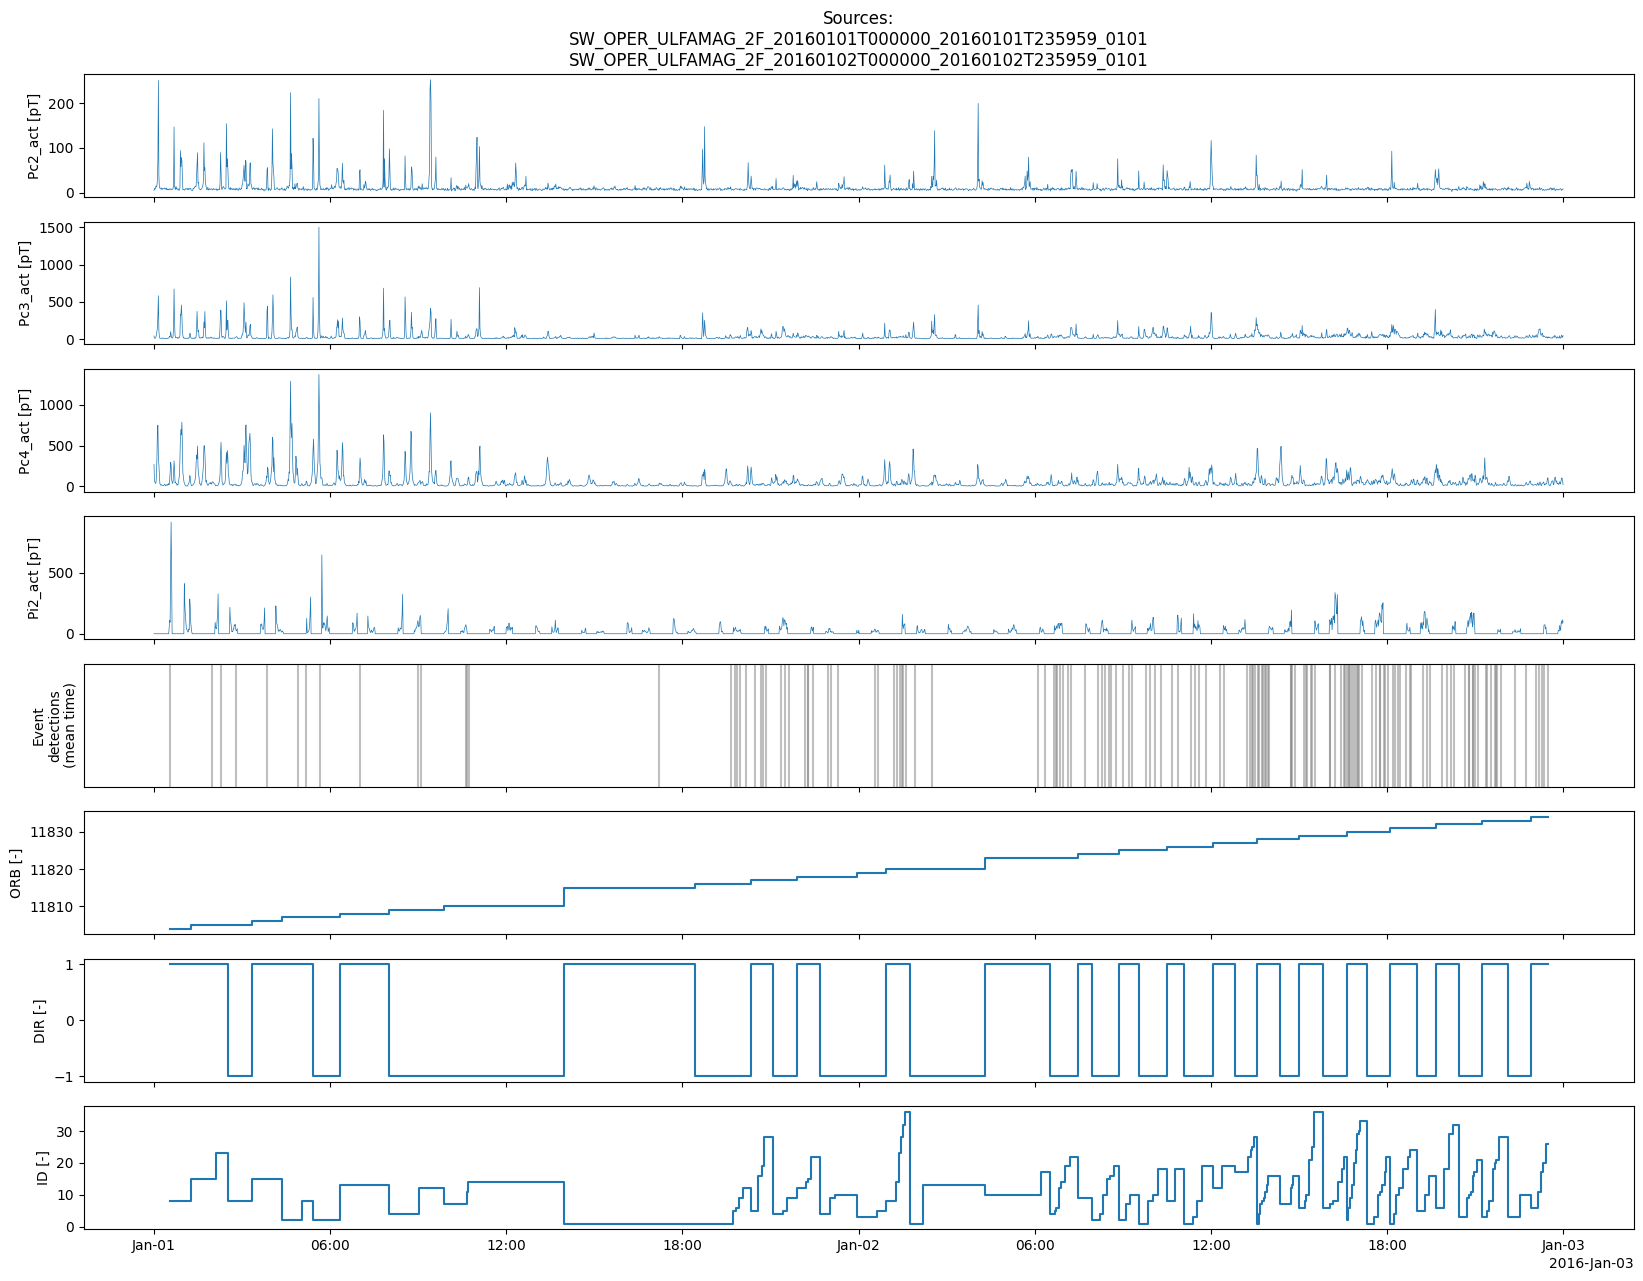

In [15]:
def preview_ulfxmag(ulf_data):
    fig, axes = plt.subplots(8, 1, figsize=(20, 15), sharex=True)
    # Plot the time series of Rms of fluctuations in each band
    for ax, var in zip(axes[:4], ["Pc2_act", "Pc3_act", "Pc4_act", "Pi2_act"]):
        ulf_data["timeseries"][var].plot.line(ax=ax, linewidth=0.5)
        ax.set_xlabel("")
    # Mark event mean times
    for t in ulf_data["event_means"]["Timestamp"].values:
        axes[4].axvline(t, alpha=0.5, color="grey")
    axes[4].set_ylabel("Event\ndetections\n(mean time)")
    axes[4].set_yticks([])
    for ax, var in zip(axes[5:8], ["ORB", "DIR", "ID"]):
        ulf_data["event_means"][var].plot.step(ax=ax, where="mid")
        ax.set_xlabel("")
    axes[0].set_title("\n".join(["Sources:"] + ulf_data["timeseries"].attrs["Sources"]))
    return fig, axes


fig, axes = preview_ulfxmag(ulf_data)

In [16]:
pd.DatetimeIndex(ulf_data["timeseries"]["Timestamp"]).is_monotonic_increasing

True

In [17]:
# NB events are not strictly ordered in time
pd.DatetimeIndex(ulf_data["event_means"]["Timestamp"]).is_monotonic_increasing

False

**Note: There is an error in the source data - at some point `ORB` is not correct - investigation ongoing**

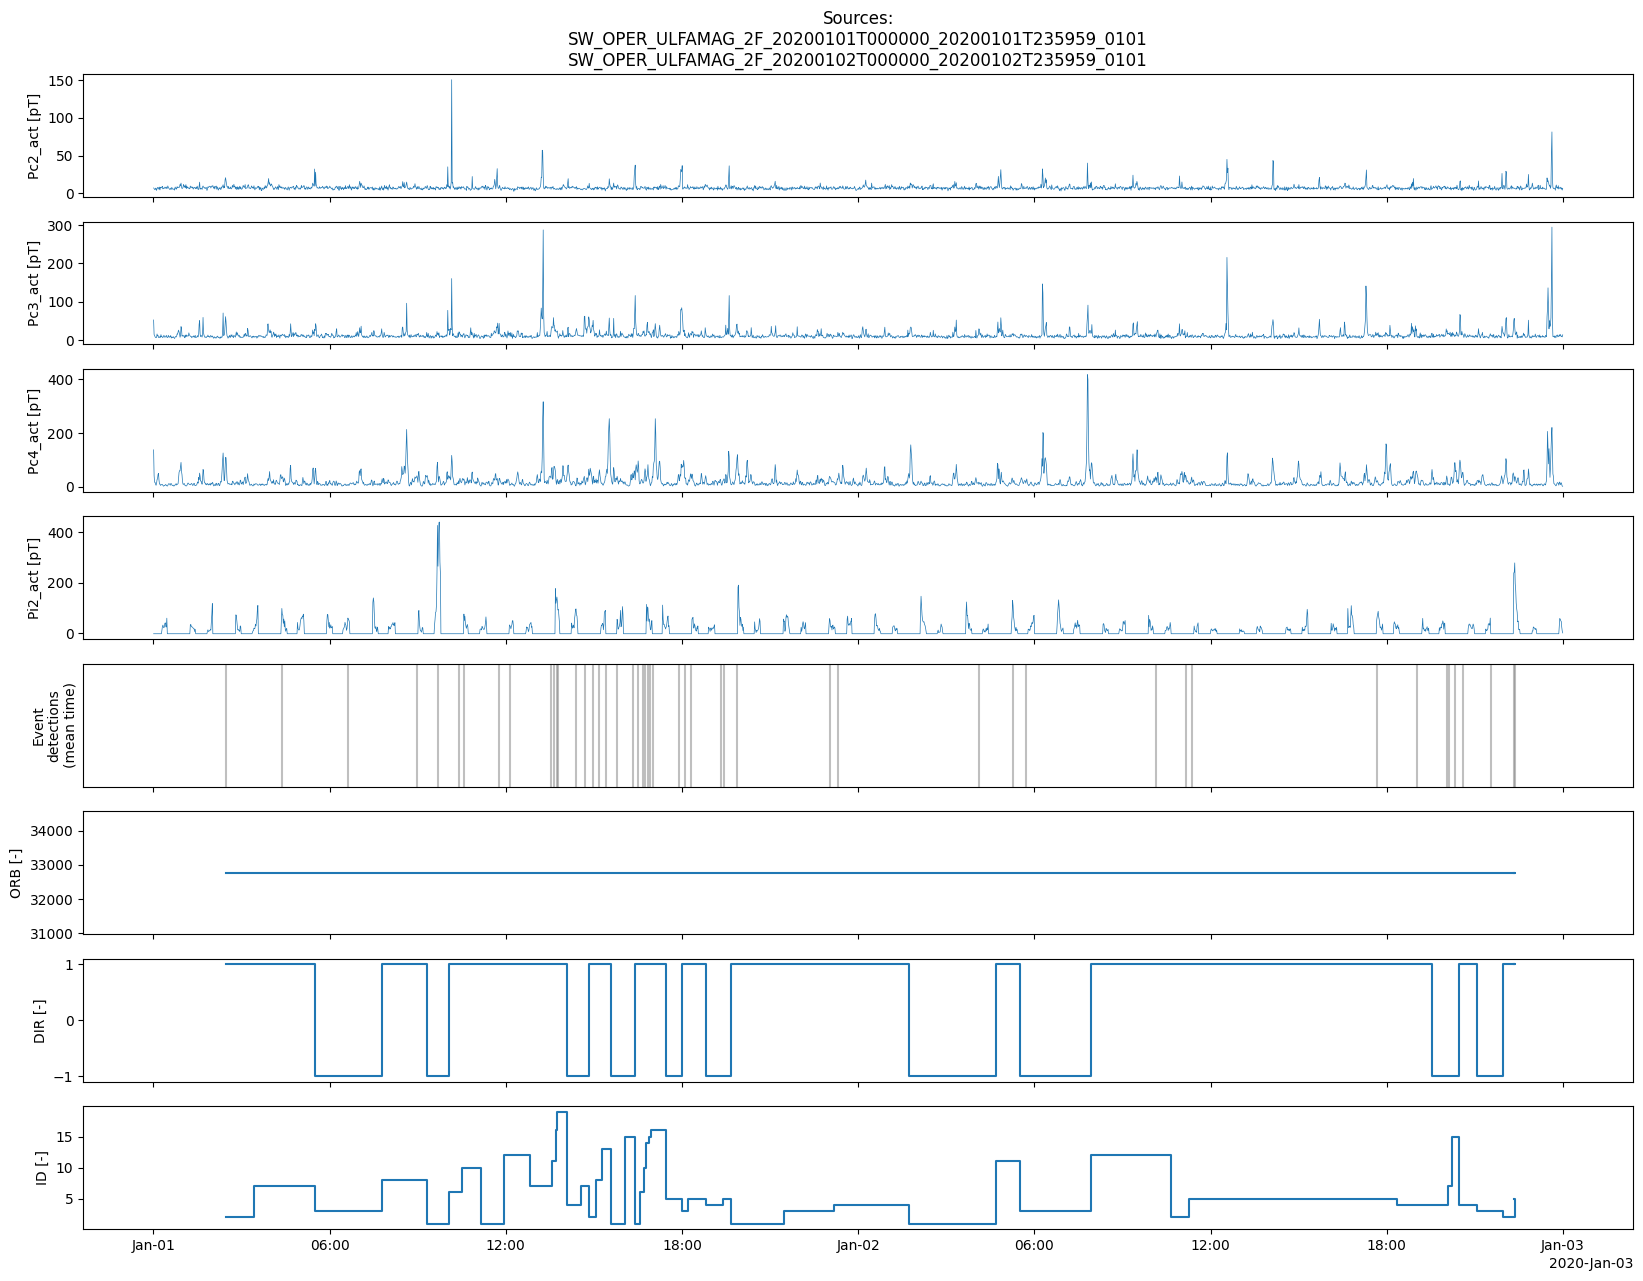

In [18]:
fig, axes = preview_ulfxmag(
    fetch_ULFxMAG(
        "A", start_time=dt.datetime(2020, 1, 1), end_time=dt.datetime(2020, 1, 3)
    )
)

### Selecting events

Each detected event is assigned an event identifier specified by the triplet of orbit number (`ORB`), flight direction (`DIR`), and event serial number (`ID`). (`ORB`, `DIR`, `ID`) are present within the event series and the event mean series. To match entries within the event series and the corresponding mean, you must use the (`ORB`, `DIR`, `ID`) triplet to form a globally unique identifier (for that spacecraft). For example:

In [19]:
Event = namedtuple("Event", ("ORB", "DIR", "ID"))


def select_event(ds, event: Event):
    mask = np.logical_and(
        ds["ORB"].data == event.ORB,
        ds["DIR"].data == event.DIR,
        ds["ID"].data == event.ID,
    )
    return ds.isel(Timestamp=mask)


event = Event(ORB=11804, DIR=1, ID=8)
ds_event = select_event(ulf_data["events"], event)
ds_event_mean = select_event(ulf_data["event_means"], event)
ds_event

<xarray.Dataset> Size: 48kB
Dimensions:       (Timestamp: 420)
Coordinates:
  * Timestamp     (Timestamp) datetime64[ns] 3kB 2016-01-01T00:30:12 ... 2016...
Data variables: (12/19)
    Spacecraft    (Timestamp) category 468B <class 'xarray.core.extension_arr...
    ORB           (Timestamp) uint32 2kB 11804 11804 11804 ... 11804 11804 11804
    Longitude_QD  (Timestamp) float64 3kB -32.03 -32.04 -32.04 ... -34.84 -34.84
    Longitude     (Timestamp) float64 3kB -102.8 -102.8 -102.8 ... -103.1 -103.1
    SZA           (Timestamp) float64 3kB 88.57 88.6 88.63 ... 100.2 100.2 100.2
    Quality       (Timestamp) int8 420B 0 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3 3
    ...            ...
    Prominence    (Timestamp) float64 3kB 0.6088 0.6209 0.6324 ... 0.623 0.605
    EPB           (Timestamp) int8 420B 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    ID            (Timestamp) uint8 420B 8 8 8 8 8 8 8 8 8 ... 8 8 8 8 8 8 8 8 8
    Power         (Timestamp) float64 3kB -2.019 -2.02 -2.02 ... -0.884 -0.8888
    Halfwidth     (Timestamp) float64 3kB 2.591 2.61 2.627 ... 4.388 4.365 4.338
    MLT_QD        (Timestamp) float64 3kB 17.2 17.2 17.2 ... 17.13 17.13 17.13
Attributes: (3)

In [20]:
ds_event_mean

<xarray.Dataset> Size: 178B
Dimensions:       (Timestamp: 1)
Coordinates:
  * Timestamp     (Timestamp) datetime64[ns] 8B 2016-01-01T00:33:41.500000
Data variables: (12/21)
    Spacecraft    (Timestamp) category 49B <class 'xarray.core.extension_arra...
    ORB           (Timestamp) uint32 4B 11804
    Longitude_QD  (Timestamp) float64 8B -33.5
    Longitude     (Timestamp) float64 8B -103.0
    SZA           (Timestamp) float64 8B 94.47
    Quality       (Timestamp) int8 1B 2
    ...            ...
    ID            (Timestamp) uint8 1B 8
    Power         (Timestamp) float64 8B -1.149
    Halfwidth     (Timestamp) float64 8B 7.675
    Freq_std      (Timestamp) float64 8B 0.8977
    Duration      (Timestamp) float64 8B 6.983
    MLT_QD        (Timestamp) float64 8B 17.16
Attributes: (3)

Plot some information from the given event.

Text(0.5, 0.98, 'Event(ORB=11804, DIR=1, ID=8)')

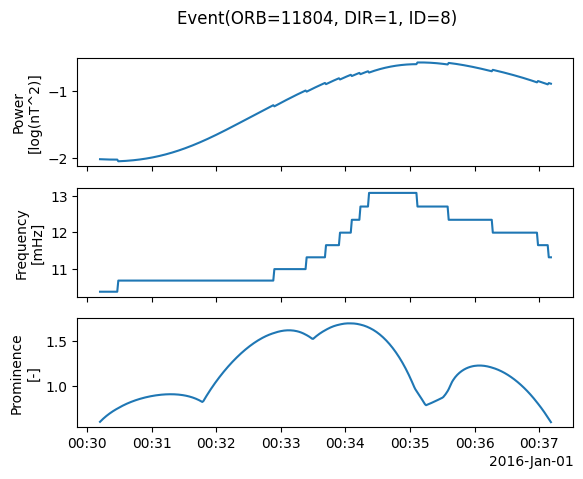

In [21]:
fig, axes = plt.subplots(3, 1, sharex=True)
for ax, var in zip(axes, ("Power", "Frequency", "Prominence")):
    ds_event[var].plot.line(ax=ax)
    ax.set_ylabel("\n".join(ax.get_ylabel().split(" ")))
    ax.set_xlabel("")
fig.suptitle(event)

## PC1xMAG demo

In [22]:
def fetch_PC1xMAG(spacecraft="A", start_time=START_TIME, end_time=END_TIME):
    def _fetch_sub_collection(name="Bp_event"):
        # Fetch time series
        request = SwarmRequest(SERVER_URL)
        collection = f"SW_OPER_PC1{spacecraft}MAG_2F:{name}"
        request.set_collection(collection)
        request.set_products(measurements=request.available_measurements(collection))
        data = request.get_between(
            start_time, end_time, asynchronous=False, show_progress=False
        )
        return data.as_xarray()

    return {
        name: _fetch_sub_collection(name)
        for name in (
            "Bp_event",
            "Bp_event_mean",
            "Ba_event",
            "Ba_event_mean",
            "Br_event",
            "Br_event_mean",
        )
    }

In [23]:
pc1_data = fetch_PC1xMAG()

In [24]:
pc1_data["Bp_event"]

<xarray.Dataset> Size: 10kB
Dimensions:       (Timestamp: 93)
Coordinates:
  * Timestamp     (Timestamp) datetime64[ns] 744B 2016-01-02T05:34:04.6780078...
Data variables: (12/18)
    Spacecraft    (Timestamp) category 141B <class 'xarray.core.extension_arr...
    ORB           (Timestamp) uint32 372B 11822 11822 11822 ... 11833 11833
    Longitude_QD  (Timestamp) float64 744B 57.75 57.32 56.89 ... 165.1 164.3
    Longitude     (Timestamp) float64 744B 3.242 3.333 3.432 ... 104.9 105.0
    SZA           (Timestamp) float64 744B 72.61 72.28 71.95 ... 73.24 72.9
    Quality_B     (Timestamp) uint8 93B 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    ...            ...
    Prominence    (Timestamp) float64 744B 2.477 2.046 2.102 ... 2.149 2.087
    Quality_p     (Timestamp) uint8 93B 1 1 1 2 1 2 1 1 1 ... 1 1 1 1 1 1 1 1 1
    ID            (Timestamp) uint8 93B 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    Power         (Timestamp) float64 744B 3.144 2.563 2.525 ... 3.0 2.824 2.763
    Halfwidth     (Timestamp) float64 744B 0.4639 0.4883 ... 0.4639 0.4639
    MLT_QD        (Timestamp) float64 744B 4.576 4.552 4.528 ... 4.554 4.51
Attributes: (3)

In [25]:
pc1_data["Bp_event_mean"]

<xarray.Dataset> Size: 560B
Dimensions:       (Timestamp: 4)
Coordinates:
  * Timestamp     (Timestamp) datetime64[ns] 32B 2016-01-02T05:35:49.81801557...
Data variables: (12/19)
    Spacecraft    (Timestamp) category 52B <class 'xarray.core.extension_arra...
    ORB           (Timestamp) uint32 16B 11822 11825 11832 11833
    Longitude_QD  (Timestamp) float64 32B 54.5 7.235 -160.5 169.4
    Longitude     (Timestamp) float64 32B 4.237 -66.51 127.0 104.4
    SZA           (Timestamp) float64 32B 70.43 71.08 115.0 76.79
    Quality       (Timestamp) uint8 4B 0 2 2 0
    ...            ...
    Power         (Timestamp) float64 32B 1.803 1.377 1.384 1.554
    ID            (Timestamp) uint8 4B 1 1 1 1
    Halfwidth     (Timestamp) float64 32B 0.3841 0.497 0.6569 0.5149
    Freq_std      (Timestamp) float64 32B 0.0 0.02079 0.08775 0.06635
    Duration      (Timestamp) float64 32B 3.755 3.505 10.51 5.507
    MLT_QD        (Timestamp) float64 32B 4.392 6.126 4.876 4.808
Attributes: (3)

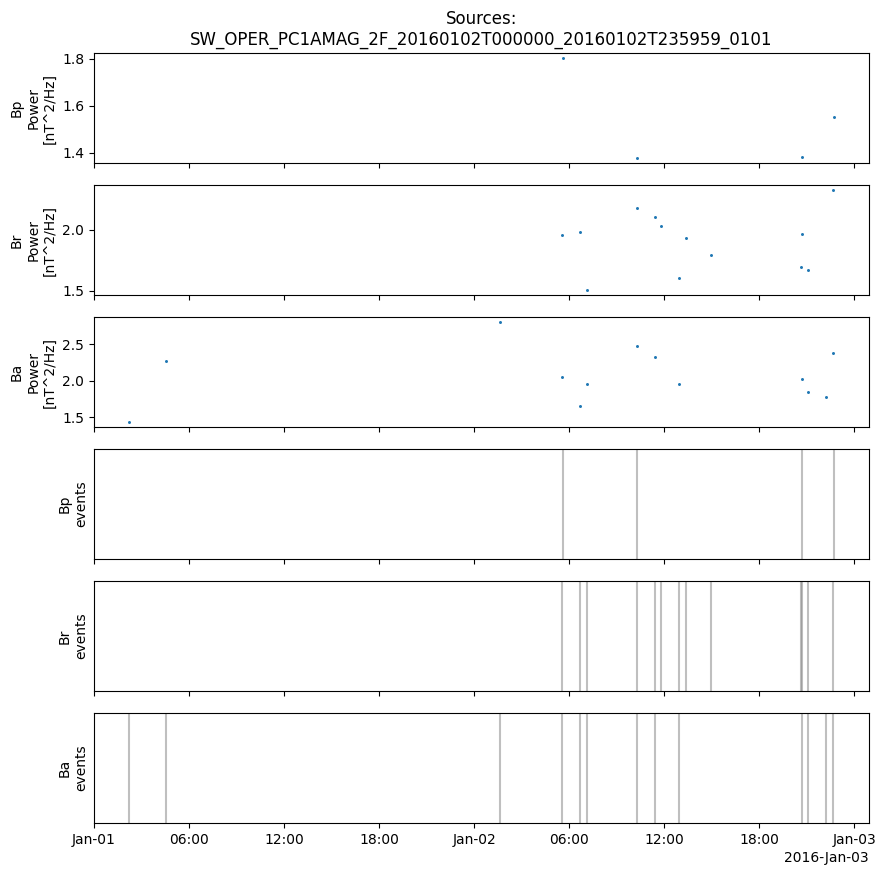

In [26]:
def preview_pc1xmag(pc1_data):
    fig, axes = plt.subplots(6, 1, sharex=True, figsize=(10, 10))
    for ax, component in zip(axes[:3], ("Bp", "Br", "Ba")):
        pc1_data[f"{component}_event_mean"]["Power"].plot.scatter(ax=ax, s=10)
        ylabel = [component] + ax.get_ylabel().split(" ")
        ax.set_ylabel("\n".join(ylabel))
        ax.set_xlabel("")
    for ax, component in zip(axes[3:], ("Bp", "Br", "Ba")):
        for t in pc1_data[f"{component}_event_mean"]["Timestamp"].values:
            ax.axvline(t, alpha=0.5, color="grey")
            ax.set_yticks([])
            ax.set_ylabel(f"{component}\nevents")
    axes[0].set_title("\n".join(["Sources:"] + pc1_data["Bp_event"].attrs["Sources"]))
    return fig, axes


fig, axes = preview_pc1xmag(pc1_data)